# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Q1) Display following stages
## a) Load 'news-msr-2.png' [Given]

In [ ]:
# Read image in TensorFlow
img_path = '/content/news-msr-2.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [ ]:
print(img.shape)

(613, 304)


In [ ]:
print(img.dtype)

<dtype: 'uint16'>


In [ ]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [ ]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [ ]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'uint16'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 613, 304, 1)
Image min and max are (12.0, 255.0)


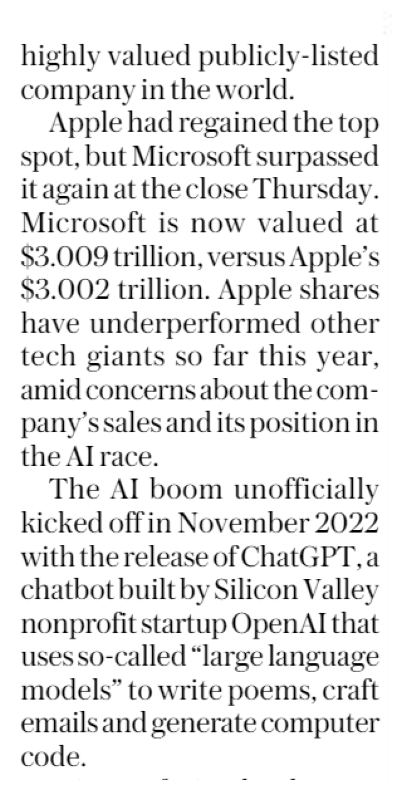

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Load 'AI.png' [Given]


In [ ]:
# Read image in TensorFlow
img_path = '/content/AI.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [ ]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_b = tf.cast(img, tf.float32)  # Convert image to float32
img_b = tf.nn.conv2d( tf.reshape(img_b, (1,img_b.shape[0],img_b.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [ ]:
print(img_b.shape)

(1, 24, 23, 1)


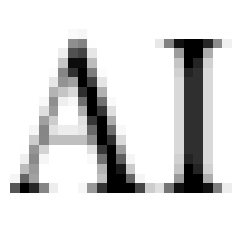

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(tf.squeeze(img_b), cmap='gray')
plt.axis('off')
plt.show()

#c) Threshold both images at $(intensity<=228)$ intensity value [2 Marks]

#d) Convolve 'news-msr-2' with 'AI' and threshold the output at $(maximum\_of\_output - 25)$ [4 Marks]

#e) Convolve this output with reflection of AI (around origin)  [4 Marks]
### [Hint: Use $tf.reverse(x,axis)$ function]